# Определение перспективного тарифа для телеком компании

## 1) Изучение общей информации

In [1]:
# Загрузим все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st


In [2]:
# Загружаем файлы, просматриваем информацию об каждом из них
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
message = pd.read_csv('/datasets/messages.csv')
tariff = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')
calls.info()
internet.info()
message.info()
tariff.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

### Вывод.
Всего у нас 5 файлов, каждый имеет свое название и свои данные.

In [3]:
# calls - статистика звонков, совершенных пользователями.
calls.info()
calls.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


4 столбца и 202607 строк.
Данный датафрейм - это список звонков, совершенных пользователями. 

Столбец id - уникальный номер каждого звонка, состоит из ("номер пользователя"_"номер звонка")

call_date - дата звонка, формат столбца - obj, __следует перевести в формат datetime__.

duration - длительность звонка, значения 0 - пропущенные звонки, для статистики они нам не понадобятся. Тип столбца - float64, это не совсем удобно, __переведем к формату int с округлением в большую сторону__ (т.к. провайдер при подсчете звонков округляет их к верхней величине).   

user_id - уникальный номер пользователя.

In [4]:
# internet - статистика использования интернета
internet.info()
internet.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


5 столбцов и 149396 строк. 

Первый столбец не имеет названия, в нем заключен порядковый номер использования интернет-трафика в статистике. Данный столбец нам не понадобится, т.к. сам датафрейм хранит порядковый номер, полностью совпадающий со значением в столбце. __Столбец удаляем__.  

id - уникальный номер использования. 

mb_used - количество использованных мб за сессию. По аналогии со звонками, данный столбец __переведем к формату int с округлением в большую сторону__.  

session_date - дата сессии, формат __приведем к datetime__.

user_id - уникальный номер пользователя

In [5]:
# message - статистика использования смс-сообщений
message.info()
message.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


3 столбца и 123036 строк.

id - уникальый номер сообщения

message_date - дата сообщения, __переводим в формат datetime__

user_id - уникальный номер пользователя

In [6]:
# tariff - информация о тарифах
tariff.info()
tariff.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


8 столбцов и 2 строки. 

Всего в наличии - 2 тарифа, в столбцах мы можем увидеть следующую информацию: количество сообщений, количество мегабайт, количество минут, стоимость за тариф, стоимость одного гигабайта, стоимость одного сообщения, стоимость минуты (последнии 3 столбца считаются при израсходовании пользователем основного траффика), названия тарифа.   

__Формат столбцов нас устраивает, оставляем все без изменений__.

In [7]:
# users - информация о пользователях
users.info()
users.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


8 столбцов и 500 строк. 

Данная вырезка содержит информацию о 500 пользователях, мы можем увидеть их уникальный номер, возраст, дату окончания пользования тарифом (формат NaN - означает, что пользователь до сих пор пользуется данным тарифом), город, имя, фамилию, дату регестрации, тариф.   

<font color='green'>Данные загружены и изучены. Используются верные методы для получения общей информации о таблице. Успешно найдены имеющиеся проблемы и намечен план действий.

## 2) Предобработка данных

### Поменяем форматы столбцов
Столбцы, у которых нужно менять форматы - возьмем из 1 части задания.

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format ='%Y.%m.%d')
calls['duration'] = calls['duration'].apply(np.ceil).apply(int)
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


In [9]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet['mb_used']=internet['mb_used'].apply(np.ceil).apply(int)
internet.info()
internet.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000
5,5,1000_5,400,2018-10-02,1000
6,6,1000_6,541,2018-09-07,1000
7,7,1000_7,416,2018-07-11,1000
8,8,1000_8,506,2018-10-08,1000
9,9,1000_9,346,2018-09-03,1000


In [10]:
message['message_date'] = pd.to_datetime(message['message_date'], format='%Y.%m.%d')
message.info()
message.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


### Ошибки в данных

In [11]:
# проверим датафрейм calls на наличие ошибок
calls.duplicated().sum()

0

In [12]:
calls.info()
calls['duration'].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Пропусков и дубликатов в датафрейме calls нет. 

Но присутствуют нулевые значения в столбце duration (время звонка). Для анализа статистики нулевые значения нам не потребуются, на тариф они не влияют, только помешают правильно анализировать время звонка (например среднее или медианное значение будут изменены). __Удалим все нулевые позиции__.

In [13]:
calls = calls.query('duration != 0')
calls.info()
calls['duration'].describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

Нулевые значения убрали, теперь вместо 202607 здесь 162994 значений. Минимальное значение - 1 секунда звонка, такое допустимо, например, когда связь оборвалась, либо человек просто сбросил. __Удалять такие значения не стоит, они понадобятся при рассчете трафика__.

In [14]:
internet.duplicated().sum()

0

In [15]:
internet.info()
internet['mb_used'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64

In [16]:
# аналогично датафрейму calls - нулевые значения могут изменить нам статистические данные. Скорее всего, причина появления 
# нулевых значений - прекращений работы интерента сразу после включения. Удаляем их
internet = internet.query('mb_used != 0')
internet.info()
internet['mb_used'].describe()
internet.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.9+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000
5,5,1000_5,400,2018-10-02,1000
6,6,1000_6,541,2018-09-07,1000
7,7,1000_7,416,2018-07-11,1000
8,8,1000_8,506,2018-10-08,1000
9,9,1000_9,346,2018-09-03,1000


129798 значений вместо 149396. __Среднее значение поменялось с 370 до 426__ (большая разница, однако). Значения траты интернет-трафика в 1 мб нас вполне устраивают, такое вполне возможно при очень короткой сессии.

In [17]:
# удалим ненужный столбец
internet = internet.drop(internet.columns[0], axis='columns')
internet.head(15)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,541,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,506,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


In [18]:
message.duplicated().sum()


0

In [19]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Дубликатов нет, столбцы уже в нужном нам формате и полностью заполнены.

In [20]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

У всех пользователей указаны тарифы, тут тоже все хорошо.

## Посчитаем траты по месяцам по тарифу

In [21]:
calls['month'] = calls['call_date'].dt.month
data_calls = calls.groupby(['user_id', 'month']).agg({'duration': ['sum', 'count']}).reset_index()
data_calls.set_axis(['user_id', 'month', 'minutes_sum', 'calls_count'], axis = 'columns', inplace=True)
data_calls.head(15)

,user_id,month,minutes_sum,calls_count
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46
5,1000,10,350,44
6,1000,11,338,37
7,1000,12,333,38
8,1001,11,430,45
9,1001,12,414,47


In [22]:
internet['month'] = internet['session_date'].dt.month
data_internet = internet.groupby(['user_id', 'month']).agg({'mb_used': ['sum']}).reset_index()
data_internet.set_axis(['user_id', 'month', 'mb_used'], axis = 'columns', inplace=True)
data_internet.head(15)

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
5,1000,10,14717
6,1000,11,14768
7,1000,12,9827
8,1001,11,18452
9,1001,12,14053


In [23]:
message['month'] = message['message_date'].dt.month
data_message = message.groupby(['user_id', 'month']).agg({'id': ['count']}).reset_index()
data_message.set_axis(['user_id', 'month','message_used'], axis = 'columns', inplace=True)
data_message.head(15)

,user_id,month,message_used
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Теперь у нас есть датафреймы, в которых хранятся количество потраченных за месяц минут, смс и мегабайт. При помощи них мы можем посчитать месячную плату пользователя. Для этого __объединим все 3 датафрейма__.

In [24]:
data = data_calls.merge(data_internet, on=['user_id', 'month'], how='outer')
data.head(15)


,user_id,month,minutes_sum,calls_count,mb_used
0,1000,5,159.0,17.0,2256.0
1,1000,6,172.0,28.0,23257.0
2,1000,7,340.0,41.0,14016.0
3,1000,8,408.0,42.0,14070.0
4,1000,9,466.0,46.0,14581.0
5,1000,10,350.0,44.0,14717.0
6,1000,11,338.0,37.0,14768.0
7,1000,12,333.0,38.0,9827.0
8,1001,11,430.0,45.0,18452.0
9,1001,12,414.0,47.0,14053.0


In [25]:
data = data.merge(data_message, on=['user_id', 'month'], how='outer')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id         3214 non-null int64
month           3214 non-null int64
minutes_sum     3168 non-null float64
calls_count     3168 non-null float64
mb_used         3201 non-null float64
message_used    2717 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


,user_id,month,minutes_sum,calls_count,mb_used,message_used
0,1000,5,159.0,17.0,2256.0,22.0
1,1000,6,172.0,28.0,23257.0,60.0
2,1000,7,340.0,41.0,14016.0,75.0
3,1000,8,408.0,42.0,14070.0,81.0
4,1000,9,466.0,46.0,14581.0,57.0
5,1000,10,350.0,44.0,14717.0,73.0
6,1000,11,338.0,37.0,14768.0,58.0
7,1000,12,333.0,38.0,9827.0,70.0
8,1001,11,430.0,45.0,18452.0,NaN
9,1001,12,414.0,47.0,14053.0,NaN


In [26]:
tariff_dict = users[['user_id', 'tariff']]

In [27]:
data = data.merge(tariff_dict, on='user_id', how='right')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id         3216 non-null int64
month           3214 non-null float64
minutes_sum     3168 non-null float64
calls_count     3168 non-null float64
mb_used         3201 non-null float64
message_used    2717 non-null float64
tariff          3216 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 201.0+ KB


,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff
0,1000,5.0,159.0,17.0,2256.0,22.0,ultra
1,1000,6.0,172.0,28.0,23257.0,60.0,ultra
2,1000,7.0,340.0,41.0,14016.0,75.0,ultra
3,1000,8.0,408.0,42.0,14070.0,81.0,ultra
4,1000,9.0,466.0,46.0,14581.0,57.0,ultra
5,1000,10.0,350.0,44.0,14717.0,73.0,ultra
6,1000,11.0,338.0,37.0,14768.0,58.0,ultra
7,1000,12.0,333.0,38.0,9827.0,70.0,ultra
8,1001,11.0,430.0,45.0,18452.0,NaN,smart
9,1001,12.0,414.0,47.0,14053.0,NaN,smart


In [28]:
# в некоторых строках есть пропущенные значения, а значит в определенный месяц пользователь не пользовался определенными 
# видами услуг (например, пользователь 1001 в ноябре и декабре не отправлял сообщения вообще). Заменит пропуски на 0.
data[['month', 'minutes_sum', 'calls_count', 'mb_used', 'message_used']] = data[['month', 'minutes_sum', 'calls_count', 'mb_used', 'message_used']].fillna(0)
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id         3216 non-null int64
month           3216 non-null float64
minutes_sum     3216 non-null float64
calls_count     3216 non-null float64
mb_used         3216 non-null float64
message_used    3216 non-null float64
tariff          3216 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 201.0+ KB


,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff
0,1000,5.0,159.0,17.0,2256.0,22.0,ultra
1,1000,6.0,172.0,28.0,23257.0,60.0,ultra
2,1000,7.0,340.0,41.0,14016.0,75.0,ultra
3,1000,8.0,408.0,42.0,14070.0,81.0,ultra
4,1000,9.0,466.0,46.0,14581.0,57.0,ultra
5,1000,10.0,350.0,44.0,14717.0,73.0,ultra
6,1000,11.0,338.0,37.0,14768.0,58.0,ultra
7,1000,12.0,333.0,38.0,9827.0,70.0,ultra
8,1001,11.0,430.0,45.0,18452.0,0.0,smart
9,1001,12.0,414.0,47.0,14053.0,0.0,smart


In [29]:
# для удобства перевем в формат int
data[['month', 'minutes_sum', 'calls_count', 'mb_used', 'message_used']] = data[['month','minutes_sum', 'calls_count', 'mb_used', 'message_used']].astype('int')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id         3216 non-null int64
month           3216 non-null int64
minutes_sum     3216 non-null int64
calls_count     3216 non-null int64
mb_used         3216 non-null int64
message_used    3216 non-null int64
tariff          3216 non-null object
dtypes: int64(6), object(1)
memory usage: 201.0+ KB


,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff
0,1000,5,159,17,2256,22,ultra
1,1000,6,172,28,23257,60,ultra
2,1000,7,340,41,14016,75,ultra
3,1000,8,408,42,14070,81,ultra
4,1000,9,466,46,14581,57,ultra
5,1000,10,350,44,14717,73,ultra
6,1000,11,338,37,14768,58,ultra
7,1000,12,333,38,9827,70,ultra
8,1001,11,430,45,18452,0,smart
9,1001,12,414,47,14053,0,smart


In [30]:
# пишем функцию, которая посчитает траты за месяц за весь тариф полностью
def pay_per_month(data):
    for rows in data:
        total = 0
        if 'smart' in data['tariff']:
            total += 550
            if data['minutes_sum'] > 500:
                total += ((data['minutes_sum'] - 500) * 3)
            if data['mb_used'] > 15360:
                total += (np.ceil((data['mb_used'] - 15360) / 1024) * 200)
            if data['message_used'] > 50:
                total += ((data['message_used'] - 50) * 3)
            return total
        if 'ultra' in data['tariff']:
            total += 1950
            if data['minutes_sum'] > 3000:
                total += ((data['minutes_sum'] - 3000) * 1)
            if data['mb_used'] >= 30720:
                total += (np.ceil((data['mb_used'] - 30720) / 1024) * 150)
            if data['message_used'] > 1000 :
                total += ((data['message_used'] - 1000) * 1)
            return total
data['pay_per_month'] = data.apply(pay_per_month, axis = 1)
data['pay_per_month'] = data['pay_per_month'].astype('int')
data.head(50)            

,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff,pay_per_month
0,1000,5,159,17,2256,22,ultra,1950
1,1000,6,172,28,23257,60,ultra,1950
2,1000,7,340,41,14016,75,ultra,1950
3,1000,8,408,42,14070,81,ultra,1950
4,1000,9,466,46,14581,57,ultra,1950
5,1000,10,350,44,14717,73,ultra,1950
6,1000,11,338,37,14768,58,ultra,1950
7,1000,12,333,38,9827,70,ultra,1950
8,1001,11,430,45,18452,0,smart,1350
9,1001,12,414,47,14053,0,smart,550


### Вывод:
Теперь у нас есть датафрейм data, в котором хранится информация  о действиях пользователей за месяц (тут указано сколько звонков он совершил, какое количество минут, смс и мегабайт он потратил, сколько заплатил за месяц).  

# 3) Анализ данных

## Тариф смарт

In [31]:
# Проанализируем тариф смарт.
data_smart = data.query('tariff == "smart"').reset_index(drop=True)
data_smart.info()
data_smart.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
user_id          2230 non-null int64
month            2230 non-null int64
minutes_sum      2230 non-null int64
calls_count      2230 non-null int64
mb_used          2230 non-null int64
message_used     2230 non-null int64
tariff           2230 non-null object
pay_per_month    2230 non-null int64
dtypes: int64(7), object(1)
memory usage: 139.5+ KB


,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff,pay_per_month
0,1001,11,430,45,18452,0,smart,1350
1,1001,12,414,47,14053,0,smart,550
2,1002,6,117,14,10871,4,smart,550
3,1002,7,214,21,17601,11,smart,1150
4,1002,8,289,37,20347,13,smart,1550
5,1002,9,206,25,16712,4,smart,950
6,1002,10,212,24,13905,10,smart,550
7,1002,11,243,25,18610,16,smart,1350
8,1002,12,236,27,18137,12,smart,1150
9,1005,1,95,11,2730,7,smart,550


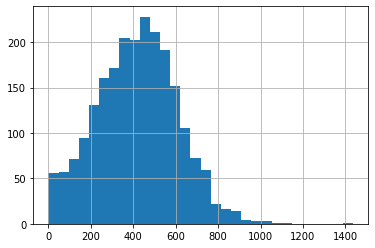

In [32]:
# начнем анализ с минут
data_smart['minutes_sum'].hist(bins = 30)

In [33]:
# благодаря функции describe - можно узнать среднее количество и стандартное отклонение
data_smart['minutes_sum'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: minutes_sum, dtype: float64

In [34]:
# проверим, сколько раз пользователи превышали допустимое количество минут
data_smart.query('minutes_sum > 500').count()

user_id          754
month            754
minutes_sum      754
calls_count      754
mb_used          754
message_used     754
tariff           754
pay_per_month    754
dtype: int64

In [35]:
# Посчитаем дисперсию (используем ddof, т.к. это небольшая выборка из генеральной базы данных)
np.var(data_smart['minutes_sum'], ddof=1)

36281.39383644458

Большинство пользователей используют от 350 до 550 минут. Немалая часть пользоветелей привышает лимит в 500 минут (1/3 от всех пользователей). Возможно, тариф с 750 минутами устроил бы пользоветелей куда больше, но среднее и медианное значения очень близки (417 и 421), следует отметить, что большинство используют минуты меньше допустимого, а значит у них к концу месяца еще есть остатки по тарифу.   

_Дисперсия = 36281.39383644458, стандартное отклонение - 190.476754, среднее количество - 417.747534._

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_used, dtype: float64

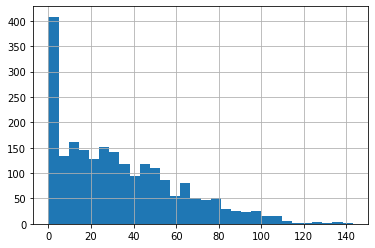

In [36]:
# проанализируем смс
data_smart['message_used'].hist(bins=30)
data_smart['message_used'].describe()

In [37]:
data_smart.query('message_used < 5').count()

user_id          408
month            408
minutes_sum      408
calls_count      408
mb_used          408
message_used     408
tariff           408
pay_per_month    408
dtype: int64

In [38]:
data_smart.query('message_used > 50').count()

user_id          564
month            564
minutes_sum      564
calls_count      564
mb_used          564
message_used     564
tariff           564
pay_per_month    564
dtype: int64

In [39]:
np.var(data_smart['message_used'], ddof=1)

796.9552557301129

Среднее и медианные значения близки к друг другу (33 и 28). А значит большая часть пользователя использует всего чуть больше половины от возможного количества сообщений. Самый пик находится в положении 0-5 смс (это около 20% от всего количества). Около 25% пользователей превышают трафик (564 пользователя отправили больше 50 смс).   

_Дисперсия 796.9552557301129, стандартное отклонение 28.230396, среднее количество 33.369058._

count     2230.000000
mean     16221.910762
std       5886.299627
min          0.000000
25%      12645.250000
50%      16529.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

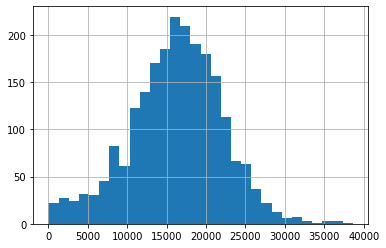

In [40]:
# анализ пользования интернетом
data_smart['mb_used'].hist(bins = 30)
data_smart['mb_used'].describe()

In [41]:
data_smart.query('mb_used > 15360').count()

user_id          1309
month            1309
minutes_sum      1309
calls_count      1309
mb_used          1309
message_used     1309
tariff           1309
pay_per_month    1309
dtype: int64

In [42]:
np.var(data_smart['mb_used'], ddof=1)

34648523.30069166

In [43]:
data_smart.query('mb_used == 0').count()

user_id          3
month            3
minutes_sum      3
calls_count      3
mb_used          3
message_used     3
tariff           3
pay_per_month    3
dtype: int64

Среднее и медианнон значения близки друг к другу (16221 и 16529), а значит выделяющихся значений не много. Но средние значения превышают лимит, а значит стоит задуматься о повышении мб в тарифе. Самый пик находится при значениях 14000-22000 мб, что означает тот факт, что большинство пользователей превышают лимит либо очень близко к нему. Основной пик приходится на разброс от 10500 до 25500. Всего 3 раза интернет не использовался вообще.

_Дисперсия 34648523.30069166. Среднее значение 16221.910762. Стандартное отклонение 5886.299627._

count    2230.000000
mean     1294.305381
std       820.900496
min       550.000000
25%       550.000000
50%      1037.000000
75%      1750.000000
max      6770.000000
Name: pay_per_month, dtype: float64

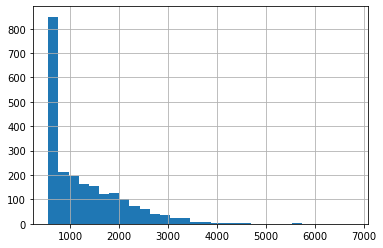

In [44]:
# анализ выручки
data_smart['pay_per_month'].hist(bins=30)
data_smart['pay_per_month'].describe()

In [45]:
data_smart.query('pay_per_month > 550').count()

user_id          1665
month            1665
minutes_sum      1665
calls_count      1665
mb_used          1665
message_used     1665
tariff           1665
pay_per_month    1665
dtype: int64

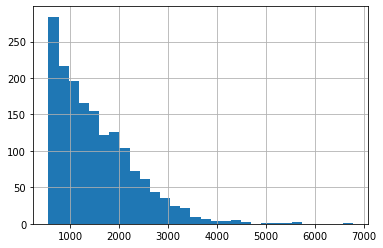

In [46]:
data_smart.query('pay_per_month > 550')['pay_per_month'].hist(bins=30)

In [47]:
data_smart.query('pay_per_month > 1950').count()

user_id          422
month            422
minutes_sum      422
calls_count      422
mb_used          422
message_used     422
tariff           422
pay_per_month    422
dtype: int64

In [48]:
np.var(data_smart['pay_per_month'], ddof=1)

673877.6236139194

In [49]:
data_smart['pay_per_month'].sum()

2886301

1665 раз из 2230 лимит трафика был превышен (почти 75% от всех пользователей). Это очень высокий показатель использования трафика, возможно, следует задуматься о создании среднего трафика между ультра и смарт, т.к. тарифа смарт пользователям не хватает. Очень много значений по сумме дают больше чем тариф ультра (422!). Возможно, следует наладить сервис, предлагающий пользователям сменить тариф на более выгодный, но все же следует понимать за что люди переплачивают (возможно большинство трат приходится именно на интернет, а значит увеличение смс и минут пользователям и не требуется, что вполне возможно исходя из анализа использования интернета!).
Самый пик приходится от 500 до 700, а значит - хоть люди и переплачивают, но во многих суммах переплата не высокая.

___Выручка по тарифу смарт 2886301___.

_Дисперсия 673877.6236139194, среднее значение 1294.305381, стандартное отклонение 820.900496._

### Общий вывод по тарифу смарт:
Большая часть пользователей использует трафик превыщающий допустимый по тарифу, а значит имеет доплаты. Большая часть переплат идет за интернет, но немало уходит и на минуты. В среднем люди выплачивают чуть больше 1000 р., а это почти в 2 раза больше основного траффика. Для того, чтобы пользователи оставались клиентами фирмы и не уходили в конкурирующие - рекомендуется рассмотреть тариф, с увеличенным в 2 раза интернет-трафиком и в 1,5 раза с минутами. Количество смс в среднем можно оставить без сильных изменений. 

## Тариф ультра

In [50]:
data_ultra = data.query('tariff == "ultra"').reset_index(drop=True)
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 8 columns):
user_id          986 non-null int64
month            986 non-null int64
minutes_sum      986 non-null int64
calls_count      986 non-null int64
mb_used          986 non-null int64
message_used     986 non-null int64
tariff           986 non-null object
pay_per_month    986 non-null int64
dtypes: int64(7), object(1)
memory usage: 61.8+ KB


986 пользований вместо 2230 в тарифе смарт. Разница почти в 2,5 раза.

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: minutes_sum, dtype: float64

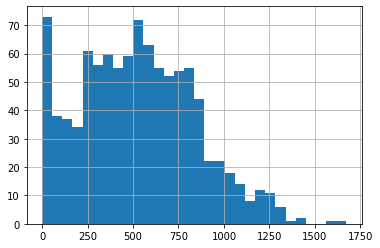

In [51]:
# анализ минут
data_ultra['minutes_sum'].hist(bins=30)
data_ultra['minutes_sum'].describe()

In [52]:
np.var(data_ultra['minutes_sum'], ddof=1)

101052.49354928388

Никто даже близко не доходит к пределу по использованию минут (максимум - 1673, допустимо 3000). Считаю что минуты в тарифе сильно завышены. Пик приходится на разброс от 250 до 850, но виден сильный всплекс в статистике, где минуты толком не используются. 

_Дисперсия 101052.49354928388. Среднее значение 526.089249, стандартное отклонение 317.887549._

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: message_used, dtype: float64

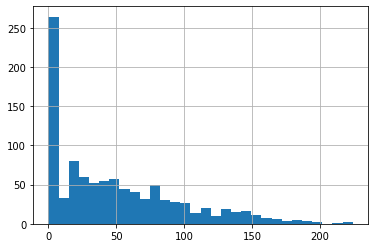

In [53]:
# анализ смс
data_ultra['message_used'].hist(bins=30)
data_ultra['message_used'].describe()

In [54]:
data_ultra.query('message_used < 50').count()

user_id          579
month            579
minutes_sum      579
calls_count      579
mb_used          579
message_used     579
tariff           579
pay_per_month    579
dtype: int64

In [55]:
data_ultra.query('message_used < 10').count()

user_id          270
month            270
minutes_sum      270
calls_count      270
mb_used          270
message_used     270
tariff           270
pay_per_month    270
dtype: int64

In [56]:
np.var(data_ultra['message_used'], ddof=1)

2285.4174246558414

Самый всплеск находится на уровне 0-10 смс (270 из 986). Максимальное значение 224 - даже близко не стоит с тарифом (1000). Более половины пользователей используют меньше 50 смс (а это уровень тарифа смарт).   

_Дисперсия 2285.4174246558414, стандартное отклонение 47.806040, среднее значение 49.313387._

count      986.000000
mean     19467.137931
std      10110.255401
min          0.000000
25%      11761.000000
50%      19320.000000
75%      26860.250000
max      49789.000000
Name: mb_used, dtype: float64

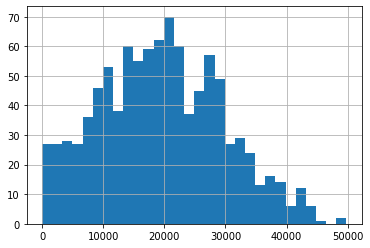

In [57]:
data_ultra['mb_used'].hist(bins=30)
data_ultra['mb_used'].describe()

In [58]:
data_ultra.query('mb_used > 30720').count()

user_id          134
month            134
minutes_sum      134
calls_count      134
mb_used          134
message_used     134
tariff           134
pay_per_month    134
dtype: int64

In [59]:
data_ultra.query('mb_used < 15360').count()

user_id          350
month            350
minutes_sum      350
calls_count      350
mb_used          350
message_used     350
tariff           350
pay_per_month    350
dtype: int64

In [60]:
np.var(data_ultra['mb_used'], ddof=1)

102217264.27537197

Основной пик идет на использование от 10000 до 30000 мб (а это укладывается в уровень тарифа). 134 раз тариф был превышен. 
В среднем - используется 19320 мб, что составляет 2/3 от всего допустимого трафика, а значит остатки на конец месяца достаточно высоки.  

_Дисперсия 102217264.27537197. Стандартное отклонение 10110.255401. Среднее значение 19467.137931._

count     986.000000
mean     2070.943205
std       378.629673
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: pay_per_month, dtype: float64

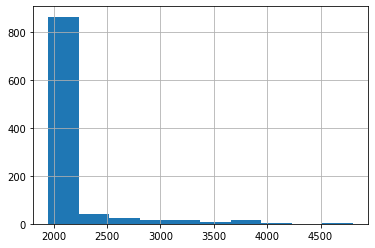

In [61]:
# анализируем выручку
data_ultra['pay_per_month'].hist(bins=10)
data_ultra['pay_per_month'].describe()

In [62]:
data_ultra.query('pay_per_month > 1950').count()

user_id          134
month            134
minutes_sum      134
calls_count      134
mb_used          134
message_used     134
tariff           134
pay_per_month    134
dtype: int64

In [63]:
np.var(data_ultra['pay_per_month'], ddof=1)

143360.42925834784

In [64]:
data_ultra['pay_per_month'].sum()

2041950

Всего 134 раза трафик был превышен (как известно из предыдущих анализов - все за счет интернета). В основном пользователям тарифа хватает с запасом. Медианное значение = стоимости тарифа!

___Выручка по тарифу составляет 2041950___

_Дисперсия 143360.42925834784. Стандартное отклонение 378.629673. Среднее значение - 2070.943205._

### Вывод по тарифу ультра:
В среднем, пользователям хватает данного тарифа, но он требует детального изучения. Количество смс и минут слишком завышено, мегабайт пользователям вполне хватает. Из чего следует вывод что ___тариф для пользователей не слишком выгодный___.

## Общий вывод по тарифам:
Выручка по тарифу смарт составляет - 2886301 при 2230 раз пользования, по тарифу ультра 2041950 при 986 раз использования. Тариф смарт приносит выручки больше, но это связано со следующими факторами:

    1) Пользователей тарифа смарт больше почти в 2,5 раза.    
    2) Тариф смарт приносит очень большой доход за счет оплаты услуг, превыщающих допустимое в тарифе.     
    3) Пользователи тарифа ультра практически не превышают допустимый трафик.

Следует обратить внимание на несколько вещей:

    1) Тариф смарт - пользователям явно не хватает трафика.
    2) Тариф ультра - смс и минуты слишком завышены, в целом пользователям не хватало только мб (134 из 986).
    
Рекомедуется возможность рассмотреть средний тариф между смартои и ультра с акцентом на интернет. Либо, для сохранения лояльности пользователей или привлечения новых - снизить стоимость по тарифу ультра, уменьшив количество минут и смс (как вариант, можно не менять стоимость, но увеличить количество мегабайт). 

___Рекомендуемый тариф - 700 минут, 80 смс, 20000 мегабайт при оплате 1000 (пользователи вполне согласны столько выплачивать), но это предварительные данные, требующие более детальной обработки.___

# 4) Проверка гипотез

### Средняя выручка тарифа смарт равна средней выручке тарифа ультра:

In [65]:
#Нулевая гипотеза: средняя выручка от тарифа смарт равна средней выручки от тарифа ультра
#Альтернативная гипотеза: средняя выручка тарифа ультра больше средней выручки тарифа смарт
alpha = 0.05
results = st.ttest_ind(data_smart['pay_per_month'], data_ultra['pay_per_month'], axis=0, equal_var=False)
if (results.pvalue < alpha) and (data_ultra['pay_per_month'].mean() > data_smart['pay_per_month'].mean()):
    print('Отвергаем нулевую теорию, альтернативная теория верна')
elif (results.pvalue < alpha) and (data_ultra['pay_per_month'].mean() < data_smart['pay_per_month'].mean()):
    print('Отвергаем нулевую и альтернативную теорию')
elif (results.pvalue) > alpha:
    print('Нулевая теория верна')
    

Отвергаем нулевую теорию, альтернативная теория верна


In [66]:
results

Ttest_indResult(statistic=-36.70976682067519, pvalue=1.2414049931248708e-246)

Альтернативная теория "Средняя выручка тарифа ультра больше средней выручки тарифа смарт" оказалась верна.
Нулевую теорию "Средняя выручка от тарифа смарт равна средней выручке от тарифа ультра" отвергаем.

### Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

In [67]:
# Для начала объединим датафреймы data и users
data1 = data.merge(users, on='user_id', how='outer')
data1.head(15)

,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff_x,pay_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_y
0,1000,5,159,17,2256,22,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,28,23257,60,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,41,14016,75,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,42,14070,81,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,46,14581,57,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,350,44,14717,73,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,338,37,14768,58,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,333,38,9827,70,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,430,45,18452,0,smart,1350,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,414,47,14053,0,smart,550,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [68]:
# Создадим отдельный датафрейм для пользователей из Москвы
data1_moscow = data1.query('city == "Москва"')
data1_moscow.head(15)

,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff_x,pay_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_y
8,1001,11,430,45,18452,0,smart,1350,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,414,47,14053,0,smart,550,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
17,1003,8,380,43,8571,37,ultra,1950,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
18,1003,9,961,105,12479,91,ultra,1950,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
19,1003,10,855,97,14779,83,ultra,1950,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
20,1003,11,824,95,11368,94,ultra,1950,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
21,1003,12,802,88,10132,75,ultra,1950,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
53,1007,4,198,21,8031,11,smart,550,65,NaN,Москва,Юна,Березина,2018-04-19,smart
54,1007,5,480,57,17708,39,smart,1150,65,NaN,Москва,Юна,Березина,2018-04-19,smart
55,1007,6,545,55,13674,26,smart,685,65,NaN,Москва,Юна,Березина,2018-04-19,smart


In [69]:
# Создадим датафрейм для пользователей не из Москвы
data1_notmoscow = data1.query('city != "Москва"')
data1_notmoscow.head(15)

,user_id,month,minutes_sum,calls_count,mb_used,message_used,tariff_x,pay_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_y
0,1000,5,159,17,2256,22,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,28,23257,60,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,41,14016,75,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,42,14070,81,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,46,14581,57,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,350,44,14717,73,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,338,37,14768,58,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,333,38,9827,70,ultra,1950,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
10,1002,6,117,14,10871,4,smart,550,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
11,1002,7,214,21,17601,11,smart,1150,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [70]:
data1_moscow['pay_per_month'].describe()

count     611.000000
mean     1550.805237
std       752.451347
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: pay_per_month, dtype: float64

In [71]:
data1_notmoscow['pay_per_month'].describe()

count    2605.000000
mean     1528.103263
std       810.369026
min       550.000000
25%       750.000000
50%      1587.000000
75%      1950.000000
max      6770.000000
Name: pay_per_month, dtype: float64

Сравним полученные датафреймы: количество использований в Москве 611, остальных 2605. Средняя плата в Москве 1550, медианное 1750, остальные 1528 и 1587 соответственно. 
Интересный факт - максимальная плата не в Москве выше чем в Москве (судя по разнице в медианном значении - таких пользователей немного).

__Нулевая гипотеза__: средняя выручка в Москве равна средней выручке в остальных регионах.

__Альтернативная гипотеза__: средняя выручка в Москве отличается от средней выручки в регионах.

In [76]:
alpha = 0.05
results2 = st.ttest_ind(data1_moscow['pay_per_month'], data1_notmoscow['pay_per_month'], axis=0, equal_var=False)
if results2.pvalue < alpha:
    print('Отвергаем нулевую теорию, средняя выручка в Москве не равна средней выручке в остальных регионах')
elif results2.pvalue > alpha:
    print('Нет причин отвергать нулевую теорию, средняя выручка в Москве равна средней выручке в остальных регионах')

Нет причин отвергать нулевую теорию, средняя выручка в Москве равна средней выручке в остальных регионах


# 5) Общий вывод:

Можно сделать следующие выводы:

    1) Средняя выручка в Москве такая же как и в остальных регионах.  
    2) Тариф ультра в среднем дает больше выручки чем тариф смарт.  
    3) Тариф смарт менее удобен для пользоветелей чем тариф ультра, т.к. мегабайт, смс и минут им явно не хватает  
    4) В тарифе ультра слишком большое количество смс и минут, пользователи столько не используют. Интернет трафика хватает же не всем.   
    5) Рекомендую рассмотреть средний тариф между ультра и смартом (такой тариф будет более удобным для пользователей, что  позволит сохранить лояльность пользователей и приток новых).  
    6) Так же рекомендуется пересмотреть тариф ультра, возможно, стоит уменьшить количество минут и смс, но увеличить       количество мегабайт при сохранении нынешней стоимости.    